# ACOL test visualisation on pascal VOC2007

## Setup stuff

In [2]:
#imports and settings:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from jupyterthemes import jtplot
from scipy.stats import threshold
import time, os
import _init_paths
import pandas as pd
import skimage.io as io
import sys
#sys.path.append('//coco/PythonAPI/')
#from pycocotools.coco import COCO
#dataDir='//coco'
dataDir='//VOCdevkit'
dataType='val2007'
_data_path = '/VOCdevkit/VOC2007'
_image_ext = '.jpg'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)
jtplot.style(grid=False)
%matplotlib inline
tf.logging.set_verbosity(tf.logging.INFO)

In [3]:
def image_path_from_index(index):
        """
        Construct an image path from the image's "index" identifier.
        """
        fileName = str(index) + str(_image_ext)
        fileName = fileName.zfill(10)
        image_path = os.path.join(_data_path, 'JPEGImages', fileName)
        assert os.path.exists(image_path), \
                'Path does not exist: {}'.format(image_path)
        return image_path

In [4]:
def vis_detections(im_id, class_name, bbox, score, thresh=0.8):
    """Visual debugging of detections."""
    #cats = coco.loadCats(coco.getCatIds())
    #classes = tuple(['__background__'] + ['__another thing__'] + [c['name'] for c in cats])
    #class_name = classes[class_name]
    #img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    im = io.imread(image_path_from_index(im_id))
    #im = im[:, :, (2, 1, 0)]
    if score > thresh:
        plt.cla()
        plt.imshow(im)
        plt.gca().add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='g', linewidth=3)
            )
        plt.gca().text(bbox[0], bbox[1] - 2,
             '{:s} {:.3f}'.format(class_name, score),
             bbox=dict(facecolor='blue', alpha=0.5),
             fontsize=14, color='white')

        plt.title('{}  {:.3f}'.format(class_name, score))
        plt.grid(False)
    plt.show()

In [33]:
pd.set_option('display.max_rows', 1000)
clustCount = 5
classCount = 80
#detections = pd.read_json('/code/ThesisProject-SCFasterRCNN9000/output/faster_rcnn_ACOL_end2end/voc_2007_test/VGGnet_fast_rcnn_iter_10002/detections_test2007_results_b8daaa24-ec61-4923-8530-610e97066d54.json')
detections = pd.read_json('/code/ThesisProject-SCFasterRCNN9000/output/faster_rcnn_ACOL_end2end/voc_2007_test/VGGnet_fast_rcnn_iter_700002/detections_test2007_results_eab12ddd-2dc4-459e-9849-b8112146339b.json')


In [34]:
detections

,bbox,category_id,cluster,image_id,score
0,"[19.0682525635, 82.3957672119, 460.766586304, ...",aeroplane,3,67,0.994578
1,"[18.2260437012, 62.7644500732, 193.500488281, ...",aeroplane,3,67,0.126320
2,"[0.0, 11.8395843506, 479.063415527, 345.905105...",aeroplane,3,92,0.088381
3,"[97.1627349854, 11.3127746582, 402.837265015, ...",aeroplane,3,128,0.534833
4,"[0.0, 20.0772705078, 375.0, 479.922729492]",aeroplane,3,213,0.178995
5,"[228.436019897, 171.893280029, 53.7870635986, ...",aeroplane,3,216,0.980753
6,"[397.235229492, 129.501327515, 91.698059082, 4...",aeroplane,3,240,0.057386
7,"[175.489089966, 116.547454834, 102.365707397, ...",aeroplane,3,243,0.992815
8,"[83.926574707, 60.7525100708, 394.90612793, 25...",aeroplane,3,248,0.071726
9,"[41.2907867432, 112.692428589, 438.07585144, 1...",aeroplane,3,260,0.989764


## cluster spread per class

In [35]:
detections[['category_id','cluster','image_id']].groupby(['category_id', 'cluster']).count()

,,image_id
category_id,cluster,
aeroplane,3,520
bicycle,1,586
bird,3,772
boat,1,763
bottle,4,800
bus,0,533
car,2,2068
cat,3,684
chair,4,2247


In [43]:
clust0=detections[(detections.category_id=='cow') & (detections.cluster==0) & (detections.score>0.8)]
clust1=detections[(detections.category_id=='cow') & (detections.cluster==2) & (detections.score>0)]
clust2=detections[(detections.category_id=='person') & (detections.cluster==0) & (detections.score>0.8)]
clust3=detections[(detections.category_id=='person') & (detections.cluster==2) & (detections.score>0)]

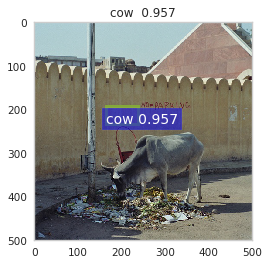

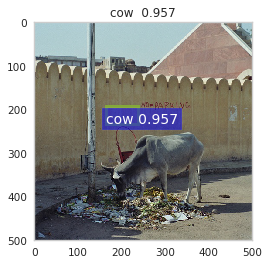

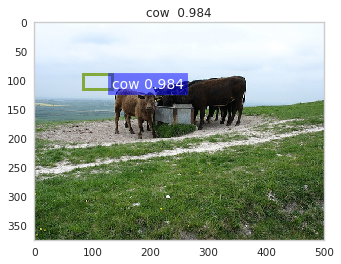

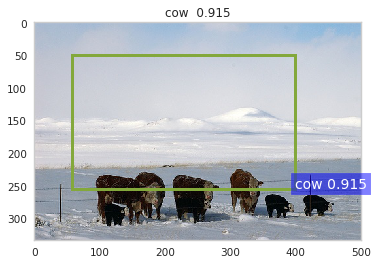

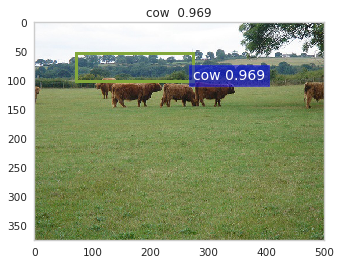

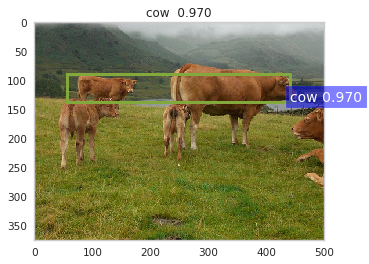

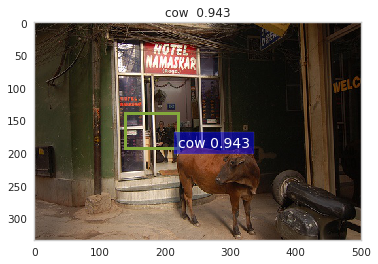

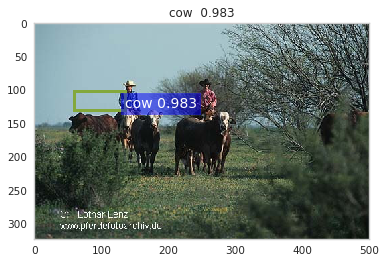

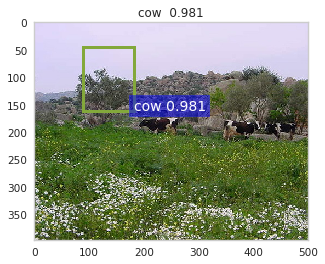

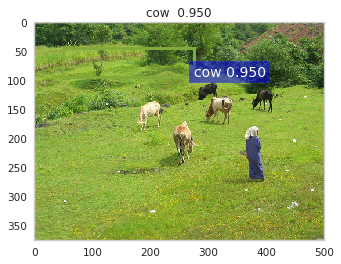

In [47]:
for i in np.random.randint(0,len(clust0),10):
    det = clust0.iloc[i]
    vis_detections(det.image_id, det.category_id, det.bbox, det.score, 0)

In [40]:
print len(clust0)
print len(clust3)
print len(clust8)

222
0
0


In [9]:
dets=detections[(detections.category_id==25) & (detections.cluster==9) & (detections.score>0.8)]
for i in np.random.randint(0,len(dets),10):
    det = dets.iloc[i]
    vis_detections(det.image_id, det.category_id, det.bbox, det.score, 0)

ValueError: low >= high